In [1]:
%matplotlib notebook

In [44]:
import numpy as np

spacebuf = 0
frames = []
points = []
blocks = []

with open('../Adafruit_PixelDust/out.txt') as f:
    frames = f.readlines()
    for i in range(len(frames)):
        spacebuf = frames[i]
        spacebuf = spacebuf.split(',')
        x, y, z = [],[],[]
        xb, yb, zb = [],[],[]
        for p in range(len(spacebuf)):
            if(spacebuf[p] == '1'):
                spacebuf[p] = 1
                x.append(p % 128)
                y.append((p // 128) % 64)
                z.append(p // (128*64))
            if(spacebuf[p] == '3'):
                spacebuf[p] = 3
                xb.append(p % 128)
                yb.append((p // 128) % 64)
                zb.append(p // (128*64))
            else:
                pass
                spacebuf[p] = 0
        point={'x':np.array(x,dtype='int8'),
               'y':np.array(y,dtype='int8'),
               'z':np.array(z,dtype='int8')}
        block={'x':np.array(xb,dtype='int8'),
               'y':np.array(yb,dtype='int8'),
               'z':np.array(zb,dtype='int8')}
        points.append(point)
        blocks.append(block)
#         spacebuf = np.array(spacebuf[0:131072])
#         spacebuf = spacebuf.reshape((16,64,128))
#         frames[i] = spacebuf

In [45]:
len(points[-1]['x'])

500

<IPython.core.display.Javascript object>


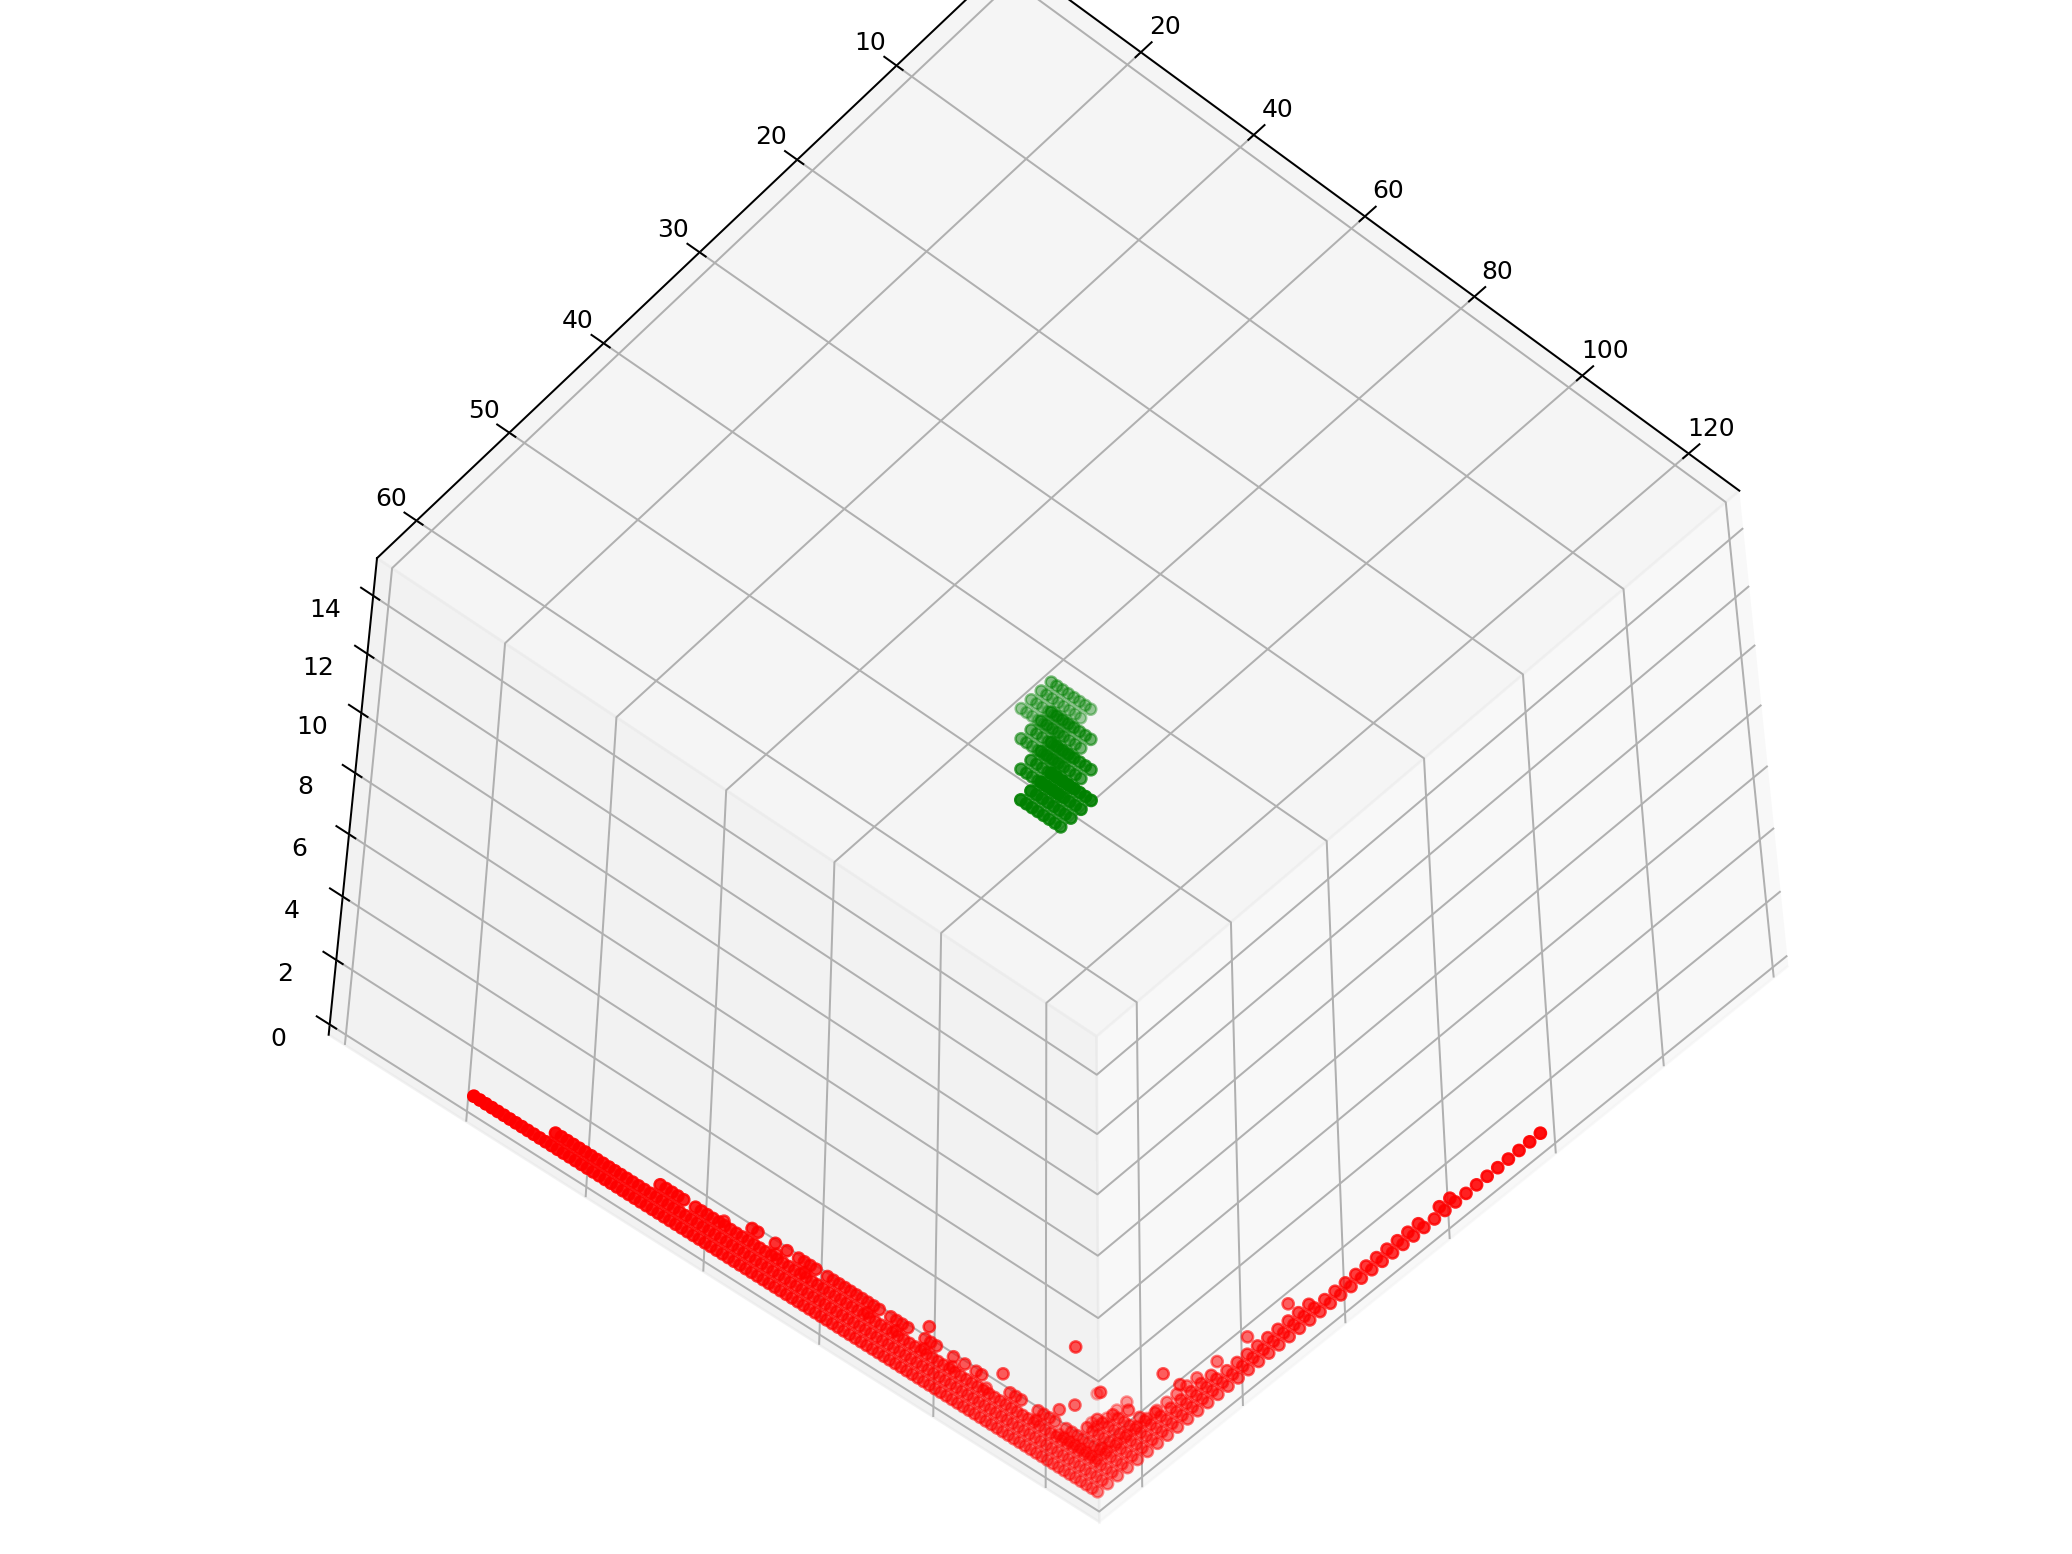

In [46]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim3d(left=0, right=127, auto=False)
ax.set_ylim3d(bottom=0, top=63, auto=False)
ax.set_zlim3d(bottom=0, top=15, auto=False)


# 定义动画每一帧的更新函数
def update(n):
    x = points[n]['x']
    y = points[n]['y']
    z = points[n]['z']
    xb = blocks[n]['x']
    yb = blocks[n]['y']
    zb = blocks[n]['z']
    ax.clear()
    ax.set_xlim3d(left=0, right=127, auto=False)
    ax.set_ylim3d(bottom=0, top=63, auto=False)
    ax.set_zlim3d(bottom=0, top=15, auto=False)
    ax.set_title('n')
    ax.scatter(x,y,z, c='r')
    ax.scatter(xb,yb,zb, c='g')
    

ani = animation.FuncAnimation(fig, update, len(points)-1, interval=10, repeat = True, repeat_delay=1, blit=True)

# 保存动图
# ani.save('scatter.gif', writer='pillow', fps=24)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update(num):
    
    for line, data in zip(lines, data_lines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Setting the axes properties
ax.set_xlim3d([0, 128])
ax.set_xlabel('X')

ax.set_ylim3d([0, 64])
ax.set_ylabel('Y')

ax.set_zlim3d([0, 16])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update, 50, interval=50)

plt.show()